In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [29]:
from sklearn.linear_model import ElasticNet
#from sklearn.cross_validation import train_test_split

In [30]:
data = pd.read_csv('train_cleaned.csv')

In [31]:
x = data.loc[:,'2ndFlrSF_log':'SaleType_WD']

In [32]:
y = data.loc[:,'SalePrice_log':'SalePrice_log']

In [19]:
train_x, test_x, train_y, test_y= train_test_split(x,y,test_size=0.2, random_state=0)

In [20]:
x.shape

(1456, 202)

In [22]:
reg = ElasticNet(alpha=1.005,l1_ratio=0.005/1.005)
reg.fit(train_x,train_y)

ElasticNet(alpha=1.005, copy_X=True, fit_intercept=True,
      l1_ratio=0.0049751243781094535, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [27]:
reg.score(train_x, train_y)

0.6946519900549978

# See Coefficients

In [30]:
reg.coef_

array([ 0.01825646,  0.00060063,  0.        ,  0.00209487,  0.00125016,
       -0.00819533,  0.017973  ,  0.        ,  0.        , -0.        ,
        0.00479815, -0.        , -0.02864191,  0.01177115, -0.00318718,
        0.00052772, -0.01553217,  0.000903  , -0.00572794,  0.02687968,
        0.01271525,  0.00076947,  0.0253981 ,  0.00356889, -0.01498694,
        0.00113314,  0.03377206,  0.00253828, -0.02617017, -0.        ,
        0.        ,  0.03532332,  0.01680865, -0.01191935, -0.        ,
        0.00335506,  0.0250545 , -0.00361511,  0.        ,  0.02680288,
        0.00032826,  0.01147864,  0.00741244,  0.00406148, -0.        ,
        0.01203613,  0.        ,  0.02389816,  0.01742288,  0.01998058,
        0.03718358, -0.00159498, -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        ,  0.        , -0.        ,
       -0.        ,  0.00629035, -0.        ,  0.        ,  0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.  

In [32]:
reg.predict(test_x).reshape((292,1))

array([[11.89138538],
       [12.31505142],
       [11.77425475],
       [12.09832936],
       [12.39674177],
       [11.83492225],
       [11.97660705],
       [12.41945221],
       [11.51893036],
       [11.69494689],
       [12.22892316],
       [12.20355931],
       [11.97668316],
       [12.21068121],
       [11.92671037],
       [12.24520297],
       [11.85377325],
       [12.06968413],
       [11.95223337],
       [12.22542597],
       [12.05062227],
       [11.64157763],
       [11.70005345],
       [11.92206775],
       [12.43934683],
       [11.77583088],
       [12.06671909],
       [11.85591402],
       [12.43283307],
       [12.00851133],
       [12.14619077],
       [12.02201876],
       [12.2318011 ],
       [12.09721713],
       [12.17265778],
       [11.61937123],
       [11.91279005],
       [11.71347028],
       [11.98223081],
       [11.69676411],
       [11.59685043],
       [11.90476675],
       [11.59533419],
       [12.39265285],
       [12.26644595],
       [12

In [112]:
np.mean((reg2.predict(test_x).reshape((292,1)) - test_y)**2)

SalePrice_log    0.04215
dtype: float64

In [33]:
model = ElasticNet(alpha=1.003,l1_ratio=0.003/1.003)

In [34]:
model.fit(x,y)

ElasticNet(alpha=1.003, copy_X=True, fit_intercept=True,
      l1_ratio=0.0029910269192422734, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [35]:
coef = pd.Series(model.coef_.reshape(-1), index = x.columns)

In [36]:
imp_coef = pd.concat([coef.sort_values()[-1:-11:-1],coef.sort_values()[10::-1]])

Text(0.5,1,'Coefficients in the Lasso Model')

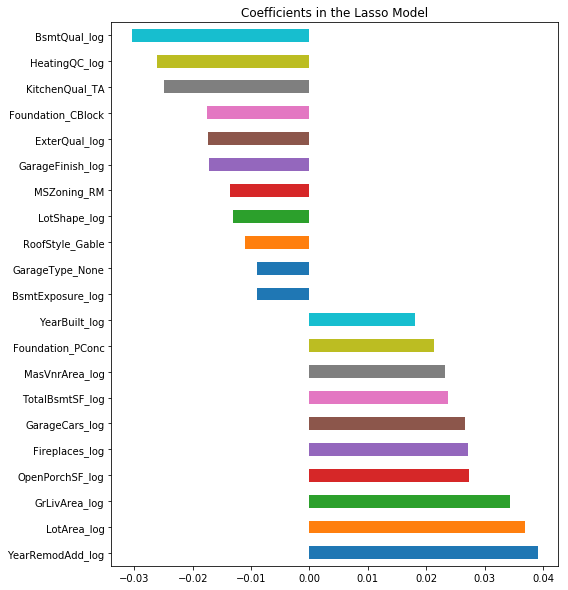

In [37]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

# Cross Validation

In [14]:
from sklearn.model_selection import cross_val_score
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv = 4))
    return(rmse)

In [15]:
model = ElasticNet(alpha=1.005,l1_ratio=0.005/1.005)

In [16]:
rmse_cv(model).mean()

0.22319196639463143

In [ ]:
0.22319196639463143

# Save Single Model Predicted Result for Kaggle Submission

In [113]:
data_sub = pd.read_csv('test_cleaned.csv')

In [114]:
data_sub_x = data_sub.loc[:,'2ndFlrSF_log':'SaleType_WD']

In [116]:
reg2.predict(data_sub_x).reshape((1459,1))

array([[11.86251911],
       [12.08577668],
       [12.25446134],
       ...,
       [11.95552553],
       [11.71374865],
       [12.39787096]])

In [117]:
log_y_sub = reg2.predict(data_sub_x).reshape((1459,1))

In [118]:
log_y_sub.shape

(1459, 1)

In [119]:
sub = np.exp(log_y_sub)

In [120]:
sub

array([[141849.10241104],
       [177331.59526746],
       [209915.70910017],
       ...,
       [155674.96180572],
       [122240.86074671],
       [242285.232163  ]])

In [121]:
sub1 = pd.DataFrame(sub,columns = ['SalePrice'])

In [122]:
sub2 = pd.DataFrame(np.arange(1461,2920),columns = ['Id'])

In [123]:
sub2['SalePrice'] = sub1['SalePrice']

In [124]:
sub2.to_csv('sub_elas_net.csv',index = False)

In [135]:
cof = clf.coef_

In [136]:
cof = cof.reshape((207,1))
cof = cof.tolist()

In [137]:
#x = pd.DataFrame(cof,columns = ['Coefficient'] )

In [138]:
name = data_sub.columns.values.reshape((207,1))
name = name.tolist()

In [139]:
len(cof)

207

In [141]:
n = len(name)

In [149]:
l = {}
for i in range(n):
    l[name[i][0]] = cof[i][0]

In [150]:
l

{'1stFlrSF_log': 0.014033103906180473,
 '2ndFlrSF_log': 0.00312889977929059,
 '3SsnPorch_log': 0.0,
 'Alley_log': 0.0,
 'BedroomAbvGr_log': -0.0,
 'BsmtCond_log': 0.0,
 'BsmtExposure_log': -0.0039017799391475373,
 'BsmtFinSF1_log': 0.012840706408893673,
 'BsmtFinSF2_log': -0.002644819276652185,
 'BsmtFinType1_log': -0.0,
 'BsmtFinType2_log': -0.0,
 'BsmtFullBath_log': 0.0,
 'BsmtHalfBath_log': -0.0,
 'BsmtQual_log': -0.09869476451836331,
 'BsmtUnfSF_log': -0.0018735890461085186,
 'EnclosedPorch_log': 0.0,
 'ExterCond_log': 0.0,
 'ExterQual_log': -0.07559346355391126,
 'Fence_log': 0.0,
 'FireplaceQu_log': -0.0,
 'Fireplaces_log': 0.07014915255899225,
 'FullBath_log': 0.0,
 'Functional_log': 0.03497961219933704,
 'GarageArea_log': 0.026030134533469324,
 'GarageCars_log': 0.0,
 'GarageCond_log': 0.0,
 'GarageFinish_log': -0.010834080319480745,
 'GarageQual_log': 0.0,
 'GarageYrBlt_log': 0.0,
 'GrLivArea_log': 0.22149735071773183,
 'HalfBath_log': 0.0,
 'HeatingQC_log': -0.028761607758879